In [1]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2024-06-10 17:40:52--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.112.89, 52.216.244.156, 3.5.11.148, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.112.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  57.5MB/s    in 6m 46s  

2024-06-10 17:47:39 (45.4 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2024-06-10 17:47:39--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.40.116, 3.5.3.139, 52.217.194.57, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.40.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80

In [2]:
!unzip train2017.zip -d /content/
!unzip annotations_trainval2017.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/train2017/000000563584.jpg  
 extracting: /content/train2017/000000276069.jpg  
 extracting: /content/train2017/000000401194.jpg  
 extracting: /content/train2017/000000502089.jpg  
 extracting: /content/train2017/000000192183.jpg  
 extracting: /content/train2017/000000425127.jpg  
 extracting: /content/train2017/000000126766.jpg  
 extracting: /content/train2017/000000324161.jpg  
 extracting: /content/train2017/000000452746.jpg  
 extracting: /content/train2017/000000423782.jpg  
 extracting: /content/train2017/000000546343.jpg  
 extracting: /content/train2017/000000249290.jpg  
 extracting: /content/train2017/000000025529.jpg  
 extracting: /content/train2017/000000316928.jpg  
 extracting: /content/train2017/000000337866.jpg  
 extracting: /content/train2017/000000547768.jpg  
 extracting: /content/train2017/000000423162.jpg  
 extracting: /content/train2017/000000224149.jpg  
 extracting: /content/train2017

In [3]:
!unzip val2017.zip -d /content/

Streaming output truncated to the last 5000 lines.
 extracting: /content/val2017/000000212226.jpg  
 extracting: /content/val2017/000000231527.jpg  
 extracting: /content/val2017/000000578922.jpg  
 extracting: /content/val2017/000000062808.jpg  
 extracting: /content/val2017/000000119038.jpg  
 extracting: /content/val2017/000000114871.jpg  
 extracting: /content/val2017/000000463918.jpg  
 extracting: /content/val2017/000000365745.jpg  
 extracting: /content/val2017/000000320425.jpg  
 extracting: /content/val2017/000000481404.jpg  
 extracting: /content/val2017/000000314294.jpg  
 extracting: /content/val2017/000000335328.jpg  
 extracting: /content/val2017/000000513688.jpg  
 extracting: /content/val2017/000000158548.jpg  
 extracting: /content/val2017/000000132116.jpg  
 extracting: /content/val2017/000000415238.jpg  
 extracting: /content/val2017/000000321333.jpg  
 extracting: /content/val2017/000000081738.jpg  
 extracting: /content/val2017/000000577584.jpg  
 extracting: /cont

<html><body><h1>LOADING THE DATA<h1><body></html>

In [4]:
!pip install pycocotools
!pip install pydot
!pip install graphviz

In [5]:
from pycocotools.coco import COCO
dataDir = '/content'
train = 'train2017'
val = 'val2017'

annFile_train = '{}/annotations/instances_{}.json'.format(dataDir, train)
annFile_val = '{}/annotations/instances_{}.json'.format(dataDir, val)
coco = COCO(annFile_train)

loading annotations into memory...
Done (t=19.60s)
creating index...
index created!


In [6]:
catID = 15
cats = coco.loadCats(ids = catID)
imgId= coco.getImgIds(catIds = [catID])[0]
annId = coco.getAnnIds(imgIds = [imgId], iscrowd = None)

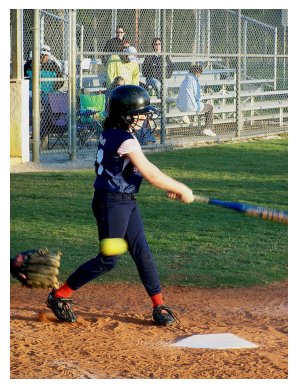

In [7]:
import cv2
import matplotlib.pyplot as plt

img = coco.loadImgs(imgId)[0]
image = cv2.imread('{}/{}/{}'.format(dataDir, train, img['file_name']))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.axis('off')
plt.show()

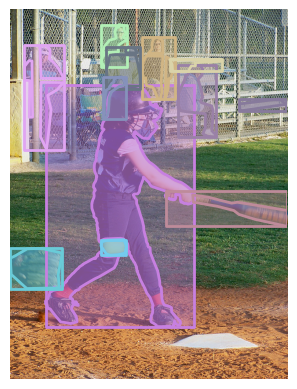

In [8]:
annId = coco.getAnnIds(imgIds = [imgId], iscrowd = None)
anns = coco.loadAnns(annId)

img_path = coco.loadImgs(imgId)[0]['file_name']
image = plt.imread('{}/{}/{}'.format(dataDir, train, img_path))

plt.imshow(image)
coco.showAnns(anns, draw_bbox = True)
plt.axis('off')
plt.show()

In [9]:
import os
import numpy as np
from random import shuffle
from tensorflow import keras
!pip install pillow
from PIL import Image

In [11]:
classes = ['person']
coco_train = COCO(annFile_train)
catIds_train = coco_train.getCatIds(catNms=classes)
imgIds_train = coco_train.getImgIds(catIds=catIds_train)
imgDict_train = coco_train.loadImgs(imgIds_train)

coco_val = COCO(annFile_val)
catIds_val = coco_val.getCatIds(catNms=classes)
imgIds_val = coco_val.getImgIds(catIds=catIds_val)
imgDict_val = coco_val.loadImgs(imgIds_val)

print(len(imgIds_train), len(catIds_train))
print(len(imgIds_val), len(catIds_val))

shuffle(imgIds_train)
shuffle(imgIds_val)

imgIds_val = imgIds_val[0:600]
imgIds_train = imgIds_train[0:6000]

train_images_person = ["train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]

print(len(train_images_person), len(val_images_person))

train_images_person = ["train2014_{0:012d}.jpg".format(ids) for ids in imgIds_train]
val_images_person = ["val2014_{0:012d}.jpg".format(ids) for ids in imgIds_val]
len(os.listdir("/content/val2017"))
count = 0


for ID in imgIds_train:
    file_path = "/content/mask_train2017/{0:012d}.jpg".format(ID)

    sampleImgIds = coco_train.getImgIds(imgIds=[ID])
    sampleImgDict = coco_train.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_train.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_train, iscrowd=0)
    anns = coco_train.loadAnns(annIds)

    mask = coco_train.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_train.annToMask(anns[i])

    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)
    count = count + 1

count = 0

for ID in imgIds_val:
    file_path = "/content/mask_train2017/{0:012d}.jpg".format(ID)

    sampleImgIds = coco_val.getImgIds(imgIds=[ID])
    sampleImgDict = coco_val.loadImgs(sampleImgIds[np.random.randint(0, len(sampleImgIds))])[0]

    annIds = coco_val.getAnnIds(imgIds=sampleImgDict['id'], catIds=catIds_val, iscrowd=0)
    anns = coco_val.loadAnns(annIds)

    mask = coco_val.annToMask(anns[0])
    for i in range(len(anns)):
        mask = mask | coco_val.annToMask(anns[i])

    mask = Image.fromarray(mask * 255, mode="L")
    mask.save(file_path)

    count = count + 1




class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)


images_path = '/content/train2017'
masks_path = '/content/mask_train2017'
batch_size = 8

train_generator = CustomDataGenerator(images_path, masks_path, batch_size)

loading annotations into memory...
Done (t=22.15s)
creating index...
index created!
loading annotations into memory...
Done (t=4.05s)
creating index...
index created!
64115 1
2693 1
6000 600


In [12]:
def validate_image_shapes(generator):
    for i in range(len(generator)):
        batch_images, _ = generator[i]
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")

validate_image_shapes(train_generator)

Streaming output truncated to the last 5000 lines.
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Shape of preprocessed image: (128, 128, 3)
Sha

Mask Image Shape: (480, 640)
Main Image Shape: (480, 640, 3)


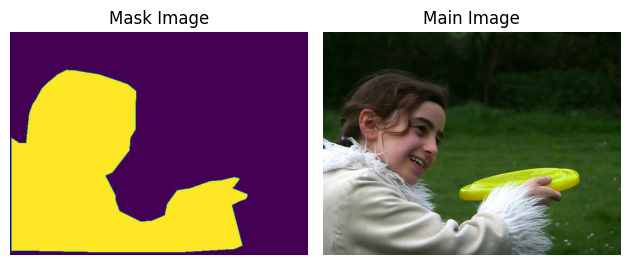

In [13]:
mask_filenames = [filename for filename in os.listdir(masks_path) if filename.endswith('.jpg')]
first_mask_filename = mask_filenames[0]
image_filename = os.path.splitext(first_mask_filename)[0] + '.jpg'

mask_image = Image.open(os.path.join(masks_path, first_mask_filename))
plt.subplot(1, 2, 1)
plt.imshow(mask_image)
plt.title('Mask Image')
plt.axis('off')

main_image = Image.open(os.path.join(images_path, image_filename))
plt.subplot(1, 2, 2)
plt.imshow(main_image)
plt.title('Main Image')
plt.axis('off')

print('Mask Image Shape:', np.array(mask_image).shape)
print('Main Image Shape:', np.array(main_image).shape)

plt.tight_layout()
plt.show()

<html><body><h1>MODEL -> U-Net<h1><body><html>

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
import keras
from keras.optimizers import *
from tensorflow.keras.utils import plot_model

In [15]:
def down_block(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal",
    max_pool_window=(2, 2),
    max_pool_stride=(2, 2)
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    # conv for skip connection
    conv = Activation("relu")(conv)

    pool = MaxPooling2D(pool_size=max_pool_window, strides=max_pool_stride)(conv)

    return conv, pool

def bottle_neck(
    input_tensor,
    no_filters,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="same",
    kernel_initializer="he_normal"
):
    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv

def up_block(
    input_tensor,
    no_filters,
    skip_connection,
    kernel_size=(3, 3),
    strides=(1, 1),
    upsampling_factor = (2,2),
    max_pool_window = (2,2),
    padding="same",
    kernel_initializer="he_normal"):


    conv = Conv2D(
        filters = no_filters,
        kernel_size= max_pool_window,
        strides = strides,
        activation = None,
        padding = padding,
        kernel_initializer=kernel_initializer
    )(UpSampling2D(size = upsampling_factor)(input_tensor))

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)


    conv = concatenate( [skip_connection , conv]  , axis = -1)


    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    conv = Conv2D(
        filters=no_filters,
        kernel_size=kernel_size,
        strides=strides,
        activation=None,
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)

    conv = BatchNormalization(scale=True)(conv)

    conv = Activation("relu")(conv)

    return conv


def output_block(input_tensor,
    padding="same",
    kernel_initializer="he_normal"
):

    conv = Conv2D(
        filters=2,
        kernel_size=(3,3),
        strides=(1,1),
        activation="relu",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(input_tensor)


    conv = Conv2D(
        filters=1,
        kernel_size=(1,1),
        strides=(1,1),
        activation="sigmoid",
        padding=padding,
        kernel_initializer=kernel_initializer
    )(conv)


    return conv

In [16]:
def UNet(input_shape = (128,128,3)):

    filter_size = [64,128,256,512,1024]

    inputs = Input(shape = input_shape)

    d1 , p1 = down_block(input_tensor= inputs,
                         no_filters=filter_size[0],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))


    d2 , p2 = down_block(input_tensor= p1,
                         no_filters=filter_size[1],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))



    d3 , p3 = down_block(input_tensor= p2,
                         no_filters=filter_size[2],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))



    d4 , p4 = down_block(input_tensor= p3,
                         no_filters=filter_size[3],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal",
                         max_pool_window=(2,2),
                         max_pool_stride=(2,2))


    b = bottle_neck(input_tensor= p4,
                         no_filters=filter_size[4],
                         kernel_size = (3,3),
                         strides=(1,1),
                         padding="same",
                         kernel_initializer="he_normal")



    u4 = up_block(input_tensor = b,
                  no_filters = filter_size[3],
                  skip_connection = d4,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")

    u3 = up_block(input_tensor = u4,
                  no_filters = filter_size[2],
                  skip_connection = d3,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")


    u2 = up_block(input_tensor = u3,
                  no_filters = filter_size[1],
                  skip_connection = d2,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")


    u1 = up_block(input_tensor = u2,
                  no_filters = filter_size[0],
                  skip_connection = d1,
                  kernel_size=(3, 3),
                  strides=(1, 1),
                  upsampling_factor = (2,2),
                  max_pool_window = (2,2),
                  padding="same",
                  kernel_initializer="he_normal")



    output = output_block(input_tensor=u1 ,
                         padding = "same",
                         kernel_initializer= "he_normal")

    model = keras.models.Model(inputs = inputs , outputs = output)


    return model

In [17]:
model = UNet(input_shape = (128, 128, 3))
model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

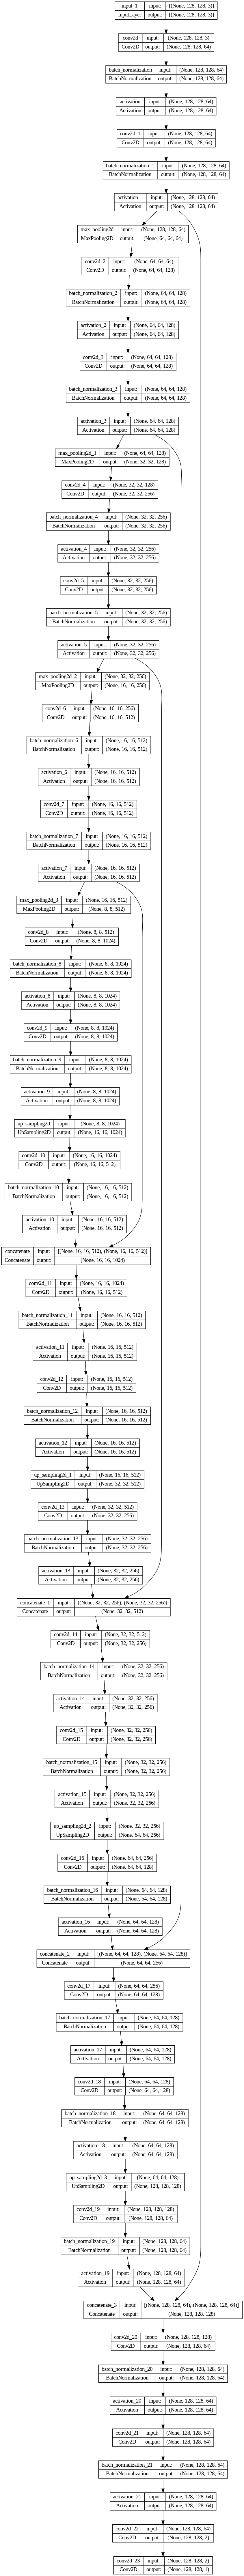

In [18]:
plot_model(model, to_file = 'unet_model.png', show_shapes = True, show_layer_names = True)

<html><body><h1>TRAINING THE MODEL<h1><body><html>

In [19]:
images_path = '/content/val2017'
masks_path = '/content/mask_val2017'
batch_size = 8

val_generator = CustomDataGenerator(images_path, masks_path, batch_size)

In [20]:
def print_preprocessed_image_shapes(model, generator):
    for i in range(len(generator)):
        batch_images, batch_mask = generator[i]
        for image in batch_images:
            print(f"Shape of preprocessed image: {image.shape}")

print_preprocessed_image_shapes(model, val_generator)

In [21]:
train_steps = len(train_generator)
val_steps = len(val_generator)

model.fit(train_generator, validation_data=val_generator, steps_per_epoch=train_steps, validation_steps=val_steps, epochs=10)

Epoch 1/10
750/750 [==============================] - 201s 222ms/step - loss: 0.3352 - accuracy: 0.8203
Epoch 2/10
750/750 [==============================] - 151s 202ms/step - loss: 0.2992 - accuracy: 0.8467
Epoch 3/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2829 - accuracy: 0.8557
Epoch 4/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2709 - accuracy: 0.8616
Epoch 5/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2569 - accuracy: 0.8692
Epoch 6/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2428 - accuracy: 0.8762
Epoch 7/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2285 - accuracy: 0.8838
Epoch 8/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2134 - accuracy: 0.8929
Epoch 9/10
750/750 [==============================] - 151s 201ms/step - loss: 0.2010 - accuracy: 0.8991
Epoch 10/10
750/750 [==============================] - 151s 201m

In [22]:
model.save('/content/model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
!zip -r /content/model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/model.h5 (deflated 8%)


In [24]:
from google.colab import files
files.download('/content/model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

sample_images shape: (8, 128, 128, 3)
sample_masks shape: (8, 128, 128)
Total batches in val_generator: 0
Batch size of val_generator: 8
1/1 [==============================] - 1s 716ms/step


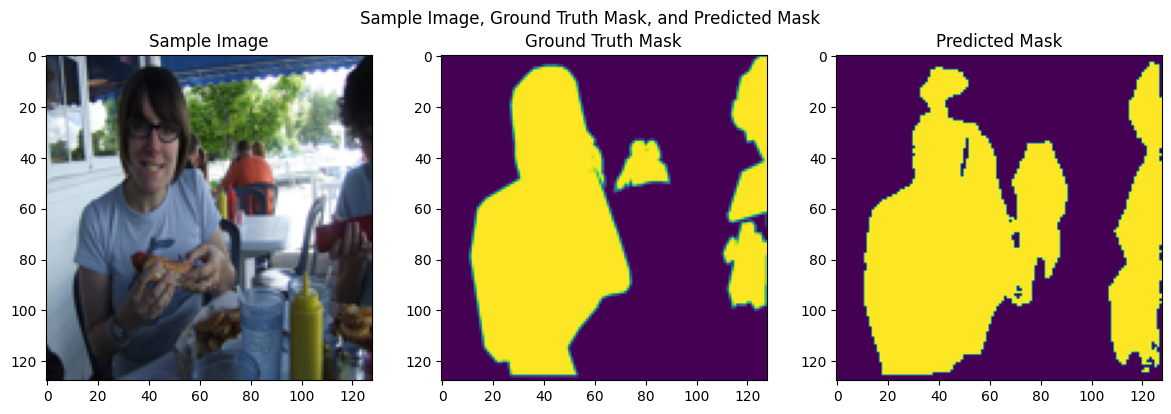

In [25]:
sample_images, sample_masks = train_generator[1]
print(f'sample_images shape: {sample_images.shape}')
print(f'sample_masks shape: {sample_masks.shape}')

total_batches = len(val_generator)
print(f'Total batches in val_generator: {total_batches}')

batch_size = val_generator.batch_size
print(f'Batch size of val_generator: {batch_size}')

if sample_images.shape[0] > 0:
    predictions = model.predict(sample_images)
    threshold = 0.5
    thresholded_predictions = (predictions > threshold).astype(np.uint8)
    idx = np.random.randint(0, sample_images.shape[0])

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(sample_images[idx])
    axes[0].set_title('Sample Image')

    axes[1].imshow(sample_masks[idx])
    axes[1].set_title('Ground Truth Mask')

    axes[2].imshow(thresholded_predictions[idx])
    axes[2].set_title('Predicted Mask')

    fig.suptitle('Sample Image, Ground Truth Mask, and Predicted Mask')
    plt.tight_layout()
    plt.show()
else:
    print("The batch is empty.")